## Семинар 12

### 1. Bias-Variance decomposition

Вспомним, что функцию потерь в задачах регрессии или классификации можно разложить на три компоненты: смещение (bias), дисперсию (variance) и шум (noise). Эти компоненты позволяют описать сложность алгоритма, альтернативно сравнению ошибок на тренировочной и тестовой выборках. Хотя такое разложение можно построить для произвольной функции потерь, наиболее просто (и классически) оно строится для среднеквадратичной функции в задаче регрессии, что мы и рассмотрим ниже. 

Пусть $(X, y)$ – некоторая выборка. Обучим интересующий нас алгоритм на этой выборке и сделаем предсказания на ней. Обозначим предсказания как $\hat{y}$. Тогда 

$$
\mathrm{bias} := \mathbb{E}(\hat{y}) - y.
$$

$$
\mathrm{variance} := \mathbb{E}[\mathbb{E}(\hat{y}) - \hat{y}]^2
$$

$$
\mathrm{noise} := \mathbb{E}[y - \mathbb{E}(y)]^2
$$

Ожидаемую среднеквадратичную ошибку для различных вариаций тренировочной выборки можно разложить как

$$
\mathrm{E}[y - \hat{y}]^2 = \mathrm{bias}^2 + \mathrm{variance} + \mathrm{noise}.
$$

**Задание для самых смелых:** покажите, что это разложение корректно. Проверьте себя [здесь](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture08-ensembles.pdf).

Разберёмся с интерпретацией компонент. 

- $\mathrm{Bias}$ – показывает отклонение среднего ответа алгоритма от ответа идеального алгоритма. $\mathrm{Bias}$ отражает ошибку модели, возникающую из-за простоты модели. Высокое смещение обычно является показателем того, что модель недообучена.


- $\mathrm{Variance}$ – показывает разброс ответов алгоритмов относительно среднего ответа алгоритма. Показывает, насколько сильно небольшие изменения в обучающей выборке скажутся на предсказаниях алгоритма. $\mathrm{Variance}$ отражает ошибку модели, возникающую из-за чрезмерной сложности модели. Высокая дисперсия обычно является показателем того, что модель переобучена.


- $\mathrm{Noise}$ – ошибка идеального классификатора, естественный неустранимый шум в данных. 

Посмотрим наглядно на примере полиномиальной регрессии.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Выборка
N = 10
X = np.linspace(-5, 5, N).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, size = N).reshape(-1, 1)

In [4]:
X

array([[-5.        ],
       [-3.88888889],
       [-2.77777778],
       [-1.66666667],
       [-0.55555556],
       [ 0.55555556],
       [ 1.66666667],
       [ 2.77777778],
       [ 3.88888889],
       [ 5.        ]])

In [5]:
y

array([[ 0.92945936],
       [ 0.57877998],
       [-0.26832777],
       [-0.81024002],
       [-0.6894337 ],
       [ 0.73682365],
       [ 1.10752146],
       [ 0.30716967],
       [-0.85758739],
       [-1.06537979]])

In [6]:
help(np.ones_like)

Help on _ArrayFunctionDispatcher in module numpy:

ones_like(a, dtype=None, order='K', subok=True, shape=None)
    Return an array of ones with the same shape and type as a given array.
    
    Parameters
    ----------
    a : array_like
        The shape and data-type of `a` define these same attributes of
        the returned array.
    dtype : data-type, optional
        Overrides the data type of the result.
    
        .. versionadded:: 1.6.0
    order : {'C', 'F', 'A', or 'K'}, optional
        Overrides the memory layout of the result. 'C' means C-order,
        'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
        'C' otherwise. 'K' means match the layout of `a` as closely
        as possible.
    
        .. versionadded:: 1.6.0
    subok : bool, optional.
        If True, then the newly created array will use the sub-class
        type of `a`, otherwise it will be a base-class array. Defaults
        to True.
    shape : int or sequence of ints, optional.


In [19]:
np.mean(y) * np.ones_like(y)

array([[-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146],
       [-0.00312146]])

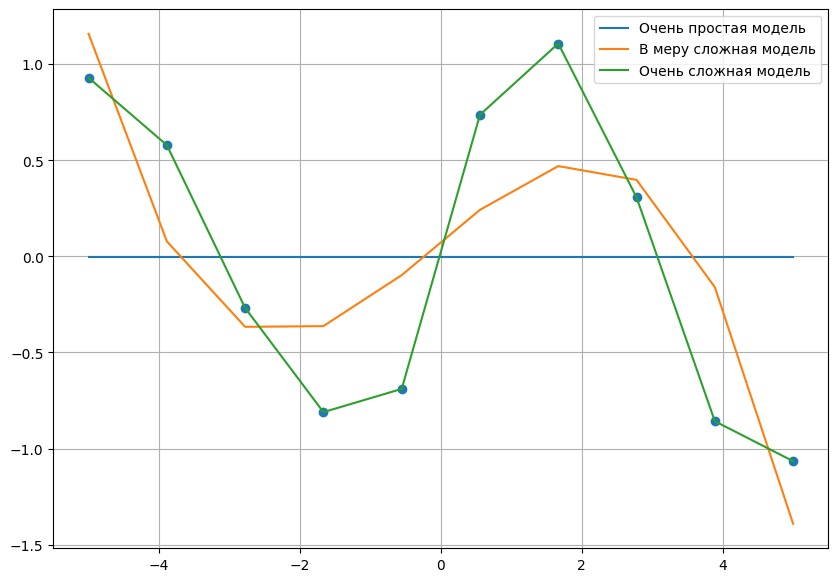

In [20]:
# Очень простая модель (регрессия на константу)
too_simple_model_predictions = np.mean(y) * np.ones_like(y)

# В меру сложная модель
X_ok = np.hstack([X, X ** 2, X ** 3])
ok_model = LinearRegression()
ok_model.fit(X_ok, y)
ok_model_predictions = ok_model.predict(X_ok)

# Очень сложная модель
X_compl = np.hstack([X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
compl_model = LinearRegression()
compl_model.fit(X_compl, y)
compl_model_predictions = compl_model.predict(X_compl)

plt.figure(figsize = (10, 7))

plt.scatter(X, y)
plt.plot(X, too_simple_model_predictions, label = 'Очень простая модель')
plt.plot(X, ok_model_predictions, label = 'В меру сложная модель')
plt.plot(X, compl_model_predictions, label = 'Очень сложная модель')
plt.grid()
plt.legend();

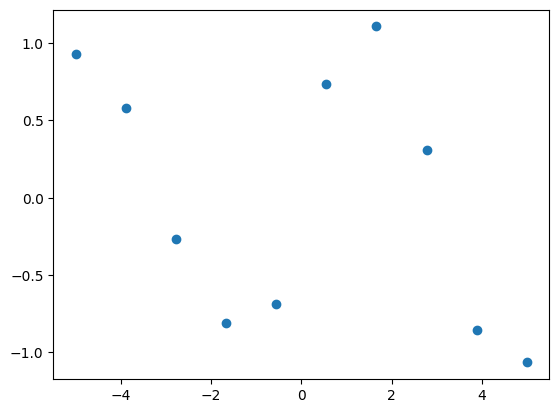

In [21]:
plt.scatter(X, y)
plt.show()

- Очень простая модель имеет большое смещение (bias), но малую (нулевую) дисперсию (variance). Модель явно недообучена.

- В меру сложная модель имеет небольшое смещение (bias) и небольшую дисперсию (variance).

- Очень сложная модель имеет небольшое смещение (bias), но большую дисперсию (variance). Модель явно переобучена.

**Задание:** пользуясь определениями выше, объясните, почему это так.

**Задание:** прокомментируйте величину смещения и дисперсии для следующих моделей:

1. Линейная регрессия, обучаемая на большой выборке без выбросов и линейно зависимых признаков. (малые смещение и дисперсия)
2. Решающее дерево, которое строится до тех пор, пока в листах не окажется по одному объекту. (малое смещение, высокая дисперсия)
3. Логистическая регрессия, относящая все точки к одному классу. (большое смещение, малая дисперсия) 

### 1.A. Bias-Variance tradeoff

Из описания выше можно заметить, что при обучении моделей возникает выбор между смещением и дисперсией: недообученная модель имеет низкую дисперсию, но высокое смещение, а переобученная – низкое смещение, но высокую дисперсию. Этот выбор можно отобразить на картинке ([источник](https://www.bradyneal.com/bias-variance-tradeoff-textbooks-update)).

![](https://www.bradyneal.com/img/bias-variance/fortmann-roe-bias-variance.png)

Вывод из неё очевиден: строить следует оптимальные по сложности модели. 

Возникает ли такой выбор при обучении любой модели? Последние исследования показывают, что поведение ошибки при обучении некоторых (современных) моделей не соответствует такой U-образной форме. Например, было показано, что ошибка продолжает убывать при расширении (увеличении числа слоёв) нейронных сетей:

<img src="https://www.bradyneal.com/img/bias-variance/neyshabur.jpg" alt="drawing" width="400"/>

В таких моделях поведение ошибки приобретает сложный вид:


<img src="https://www.bradyneal.com/img/bias-variance/double_descent.jpg" alt="drawing" width="800"/>

### 3. От деревьев к случайному лесу

#### 3.1 Решающее дерево

Мотивацию построения алгоритма случайного леса (Random Forest) удобно рассматривать в терминах смещения и дисперсии. Начнём с построения решающего дерева.

In [ ]:
!pip install --upgrade mlxtend

In [22]:
# Пример отсюда: http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

from sklearn.model_selection import train_test_split
from mlxtend.data import boston_housing_data

X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123,
                                                    shuffle = True)

In [23]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# TODO: обучите решающее дерево без ограничений на тренировочной выборке
# TODO: рассчитайте MSE на тренировочной и тестовой выборках

dt = DecisionTreeRegressor(random_state = 123)
dt.fit(X_train, y_train)
print("MSE_train: ", mean_squared_error(y_train, dt.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, dt.predict(X_test)))

MSE_train:  0.0
MSE_test:  19.835789473684212


In [28]:
DecisionTreeRegressor(random_state = 123).fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [29]:
from mlxtend.evaluate import bias_variance_decomp

# TODO: воспользуйтесь функцией bias_variance_decomp и выведите среднее смещение и среднюю дисперсию модели
# на тестовой выборке
_, avg_bias, avg_var = bias_variance_decomp(dt, X_train, y_train, X_test, y_test, 
                                            loss = 'mse', random_seed = 123)

In [30]:
avg_bias

14.20760626315789

In [31]:
avg_var

17.626895710526316

Как мы обсуждали на предыдущем семинаре, такое дерево окажется сильно переобученным (высокая дисперсия и низкое смещение). Постараемся исправить это. На лекции мы обсуждали, что один из способов борьбы с переобучением – построение композиций моделей. На этом семинаре мы рассмотрим построение композиций при помощи бэггинга.

#### 3.2 Бэггинг

Вспомним суть алгоритма:

1. Обучаем много деревьев на бутстрапированных подвыборках исходной выборки независимо друг от друга. Бутстрапированную подвыборку строим при помощи выбора $N$ (размер исходной выборки) наблюдений из исходной выборки с возвращением. 

2. Усредняем предсказания всех моделей (например, берём арифметическое среднее). 

Можно показать, что модель, построенная при помощи бэггинга, будет иметь **то же смещение**, что и у отдельных деревьев, но значительно **меньшую дисперсию** (при выполнении некоторых условий). 

In [32]:
from sklearn.ensemble import BaggingRegressor

base_tree = DecisionTreeRegressor(random_state = 123)

# TODO: обучите бэггинг с 20 деревьями, каждое из которых строится без ограничений

bagging = BaggingRegressor(estimator = base_tree, n_estimators = 20, random_state = 123)

# TODO: выведите среднее смещение и среднюю дисперсию модели на тестовой выборке

_, avg_bias, avg_var = bias_variance_decomp(bagging, X_train, y_train, X_test, y_test, 
                                            loss = 'mse', random_seed = 123)

In [34]:
_

19.50277661430921

In [33]:
avg_bias

15.67677450032483

In [35]:
avg_var

3.8260021139843747

In [38]:
(avg_bias + avg_var) - _

-3.552713678800501e-15

Как мы видим, по сравнению с единичным деревом смещение практически не изменилось, но дисперсия уменьшилась в несколько раз!

Посмотрим, как это отразилось на среднеквадратичной ошибке.

In [39]:
# TODO: рассчитайте MSE на тренировочной и тестовой выборках для бэггинга
print("MSE_train: ", mean_squared_error(y_train, bagging.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, bagging.predict(X_test)))

MSE_train:  3.976013206214689
MSE_test:  16.741898848684205


Среднеквадратичная ошибка на тренировочной выборке больше не равна 0, а на тестовой – уменьшилась, что говорит о том, что мы успешно победили переобучение единичного решающего дерева. 

Можем ли мы снизить переобучение ещё сильнее? Можем!

#### 3.3 Случайный лес

При построении каждого дерева в бэггинге в ходе создания очередного узла будем выбирать случайный набор признаков, на основе которых производится разбиение. В результате такой процедуры мы уменьшим корреляцию между деревьями, за счёт чего снизим дисперсию итоговой модели. Такой алгоритм назвывается **случайным лесом** (Random Forest). 

По сравнению с единичным деревом к параметрам случайного леса добавляются:
- `max_features` – число признаков, на основе которых проводятся разбиения при построении дерева.

- `n_estimators` – число деревьев. 

Естественно, все параметры, относящиеся к единичному дереву, сохраняются для случайного леса.

In [40]:
from sklearn.ensemble import RandomForestRegressor

# TODO: обучите случайный лес с 20 деревьями, каждое из которых строится без ограничений
rf = RandomForestRegressor(n_estimators = 20, random_state = 123)

# TODO: выведите среднее смещение и среднюю дисперсию модели на тестовой выборке
_, avg_bias, avg_var = bias_variance_decomp(rf, X_train, y_train, X_test, y_test, 
                                            loss = 'mse', random_seed = 123)

In [41]:
avg_bias

15.627807420283704

In [42]:
avg_var

3.8268096348149667

In [43]:
# TODO: рассчитайте MSE на тренировочной и тестовой выборках для случайного леса
print("MSE_train: ", mean_squared_error(y_train, rf.predict(X_train)))
print("MSE_test: ", mean_squared_error(y_test, rf.predict(X_test)))

MSE_train:  4.114859039548022
MSE_test:  16.382874177631578


Как мы видим, по сравнению с бэггингом смещение вновь осталось практически неизменным, а дисперсия немного уменьшилась. Конечно, если подобрать хорошие гиперпараметры, то получится снизить дисперсию ещё больше. 

Ошибка на тренировочной выборке увеличилась, а на тестовой – уменьшилась, что означает, что мы близки к нашей цели по борьбе с переобученными деревьями!

### 4. Особенности случайного леса

#### 4.1 Число деревьев и "Случайный лес не переобучается"

В своём [блоге](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks) Лео Бриман (Leo Breiman), создатель случайного леса, написал следующее:

> Random forest does not overfit. You can run as many trees as you want.

**Обратите внимание:** как говорилось на лекции, случайный лес не переобучается именно с ростом числа деревьев (за счёт совместной работы бэггинга и использования случайных подпространств), но не в принципе. Посмотрим на поведение случайного леса при росте числа деревьев.

In [44]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123,
                                                    shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

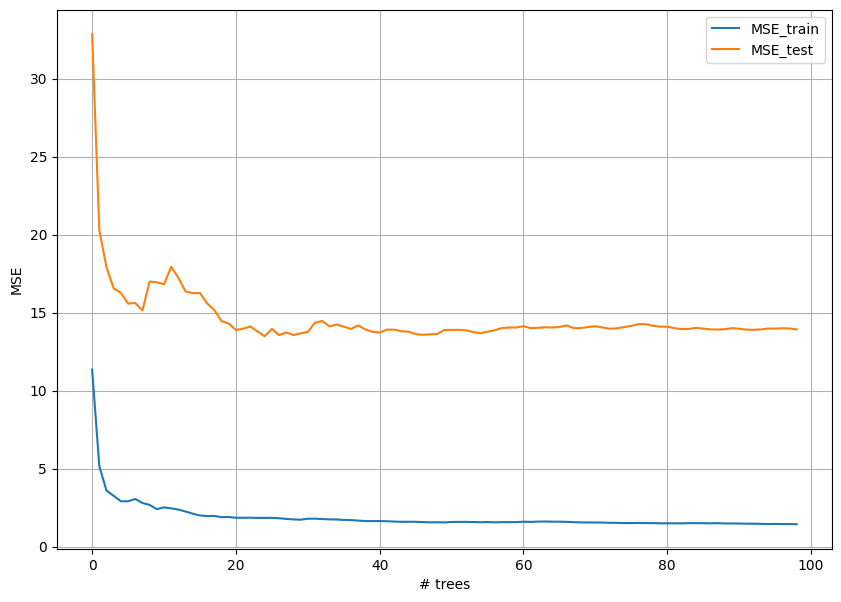

In [45]:
n_trees = 100
train_loss = []
test_loss = []

for i in range(1, n_trees):
    rf = RandomForestRegressor(n_estimators = i, random_state = 123)
    rf.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'MSE_train')
plt.plot(test_loss, label = 'MSE_test')
plt.ylabel('MSE')
plt.xlabel('# trees')
plt.legend();

Как и ожидалось, по достижении некоторого числа деревьев обе ошибки практически не изменяются, то есть переобучения при росте числа деревьев не происходит.

Однако в какой-нибудь другой плоскости на реальных данных переобучение может произойти: [пример 1](https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit), [пример 2](https://mljar.com/blog/random-forest-overfitting/). 

В нашем же случае случайный лес, скорее, лишь страдает от регуляризации. Например, посмотрим на поведение модели при изменении максимальной глубины деревьев (поэксперементируйте с другими параметрами).

In [47]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap

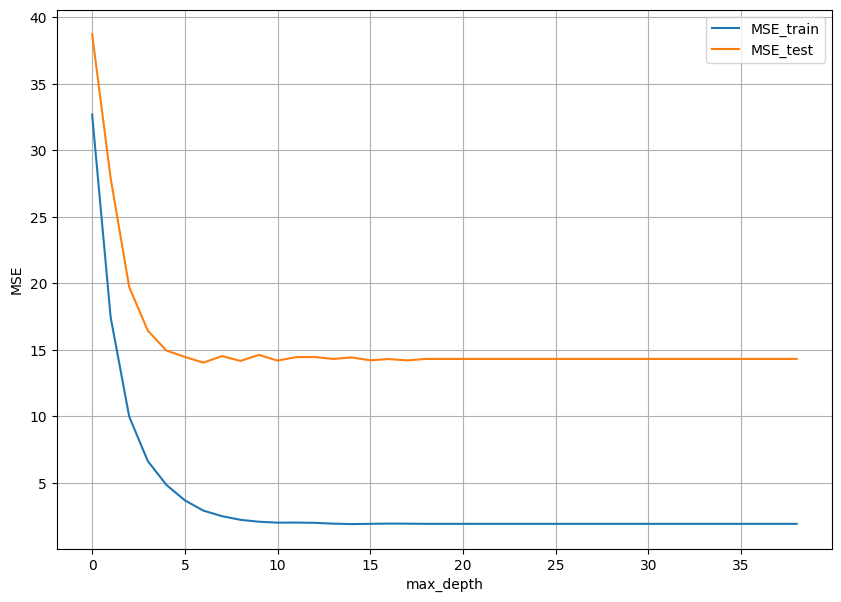

In [46]:
max_depth = 40
train_loss = []
test_loss = []

for i in range(1, max_depth):
    rf = RandomForestRegressor(n_estimators = 20, max_depth = i, random_state = 123)
    rf.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'MSE_train')
plt.plot(test_loss, label = 'MSE_test')
plt.ylabel('MSE')
plt.xlabel('max_depth')
plt.legend();

Переобучение не наблюдается. Вообще же, как обычно, гиперпараметры случайного леса стоит подбирать на кросс-валидации.

#### 4.2 Out-of-bag-ошибка

Как мы обсудили выше, при построении случайного леса каждое дерево строится на бутстрапированной подвыборке, полученной из исходной обучающей выборки случайным набором с повторениями. Понятно, что некоторые наблюдения попадут в такую подвыборку несколько раз, а некоторые не войдут в неё вообще. Для каждого дерева можем рассмотреть объекты, которые не участвовали в обучении и использовать их для валидации.

Усреднённая ошибка на неотобранных образцах по всему случайному лесу называется **out-of-bag-ошибкой**.

In [48]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123,
                                                    shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# oob_score_ = R2 на невиденных наблюдениях
rf = RandomForestRegressor(n_estimators = 100, random_state = 123, oob_score = True)
rf.fit(X_train, y_train)
rf.oob_score_

0.8763261039272027

### 5. Тестирование случайного леса на разных данных

Ниже представлены шаблоны для сравнения случайного леса и других моделей на данных разных типов. Проведите побольше экспериментов, используя разные модели и метрики. Попробуйте подобрать гиперпараметры случайного леса так, чтобы достичь какого-нибудь порога качества. 

**Внимание:** в этой части вам предстоит скачивать объёмные наборы данных. Не забудьте удалить их после семинара, если не планируете использовать их в дальнейшем, чтобы они не занимали лишнее место на вашем компьютере.

**! Случайный лес может обучаться достаточно долго.**

#### 5.1 Бинарная классификация на примере [Kaggle Predicting a Biological Response](https://www.kaggle.com/c/bioresponse/data?select=train.csv)

In [52]:
# Загрузка данных
!wget  -O 'kaggle_response.csv' -q 'https://www.dropbox.com/s/uha70sej5ugcrur/_train_sem09.csv?dl=1'

In [53]:
data = pd.read_csv('kaggle_response.csv')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# TODO: обучите логистическую регрессию и случайный лес с дефолтными параметрами
# Сравните их AUC ROC на тестовой выборке

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict_proba(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
roc_auc_score(y_test, pred_rf[:, 1])

0.8774668752066326

In [56]:
roc_auc_score(y_test, pred_lr[:, 1])

0.8014674092723989

#### 5.2 Изображения на примере [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [57]:
# Загрузка данных
import torchvision

fmnist = torchvision.datasets.FashionMNIST('./', download = True)
X = fmnist.data.numpy().reshape(-1, 28 * 28)
y = fmnist.targets.numpy()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <25C510F7-7AEE-3D64-80ED-95874DC6BECD> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


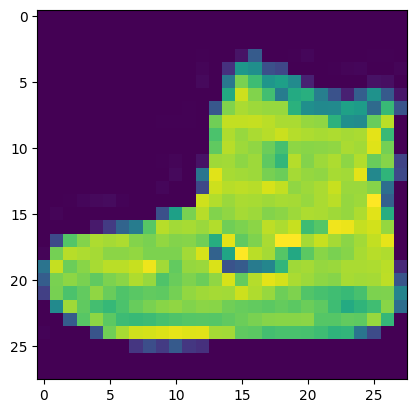

In [58]:
plt.imshow(X[0, :].reshape(28, 28))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# TODO: обучите случайный лес и kNN с дефолтными параметрами
# Сравните их доли правильных ответов на тестовой выборке

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [61]:
accuracy_score(y_test, pred_rf)

0.8789444444444444

In [62]:
accuracy_score(y_test, pred_knn)

0.8505555555555555